#Harshith Sai Gavi Matam (s4949447)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/CSL_Lab/Lab2')

Mounted at /content/drive


In [30]:
import random
import numpy as np
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed, Flatten
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot as plt 

from utils import get_activation_matrix
from plot_functions import plot_activation_matrix
from mirman_utils import LensParser, Binarizer, multi_plot

#Part 1: Recreating Mirman et al.

##Exercise 1

A) Previous studies have shown that statistical learning has an effect on word learning. Through this simulation, Mirman et al studied why and how it has an effect on word learning.

B) Analysing the results revealed that the model was able to learn two types of Nonwords because model learned to have distinct hidden representations for the syllables during the exposure phase. It also revealed that the representations for second syllables were similar, which lead to the poor performance of Nonwords and partwords, as some of the partwords and all of the Nonwords begin with a second syllable. The reason for second syllables having similar representations is because of the fact that they share the word boundary with many words, whereas in contrast, first syllable shares a one-to-one relationship with the second syllable making it easier to represent. The conclusion drawn was that exhibiting high transitional probability results in distinct representations, and it is the reason for infants and adults being better at learning labels of high transitional probability. It can be summarised by stating that development of hidden representations, due to the learning of transitional probabilities, for the syllables will affect the word learning.

C) Humans use statistical learning for a major part of their lives, and word learning is a process where they exhibit statistical learning. The mechanism of influence the statistical learning has on the word learning was surfaced through the simulation experiment. It was discovered that high transitional probability syllables have distinct representations, and low transitional probability syllables have similar or less distinct representations. This distinct representations of high transitional probability syllables makes the learning faster than the rate of learning for the low transitional probability syllables, which in turn makes the learning of words faster than the partwords and Nonwords.

##Exercise 2

###A)

There are 100 words, with input syllables of range [3, 9] in them. The total number of input syllables of all ranges add upto 500, and since every input is followed by an output in the lens file, there are a total of 1000 syllables. The number of words and the number of syllables it contains is plotted below.



In [111]:
lp = LensParser()
exposure_dat = lp.parse_sequence('/content/drive/My Drive/CSL_Lab/Lab2/exposureSet2Syll35.ex')

<BarContainer object of 10 artists>

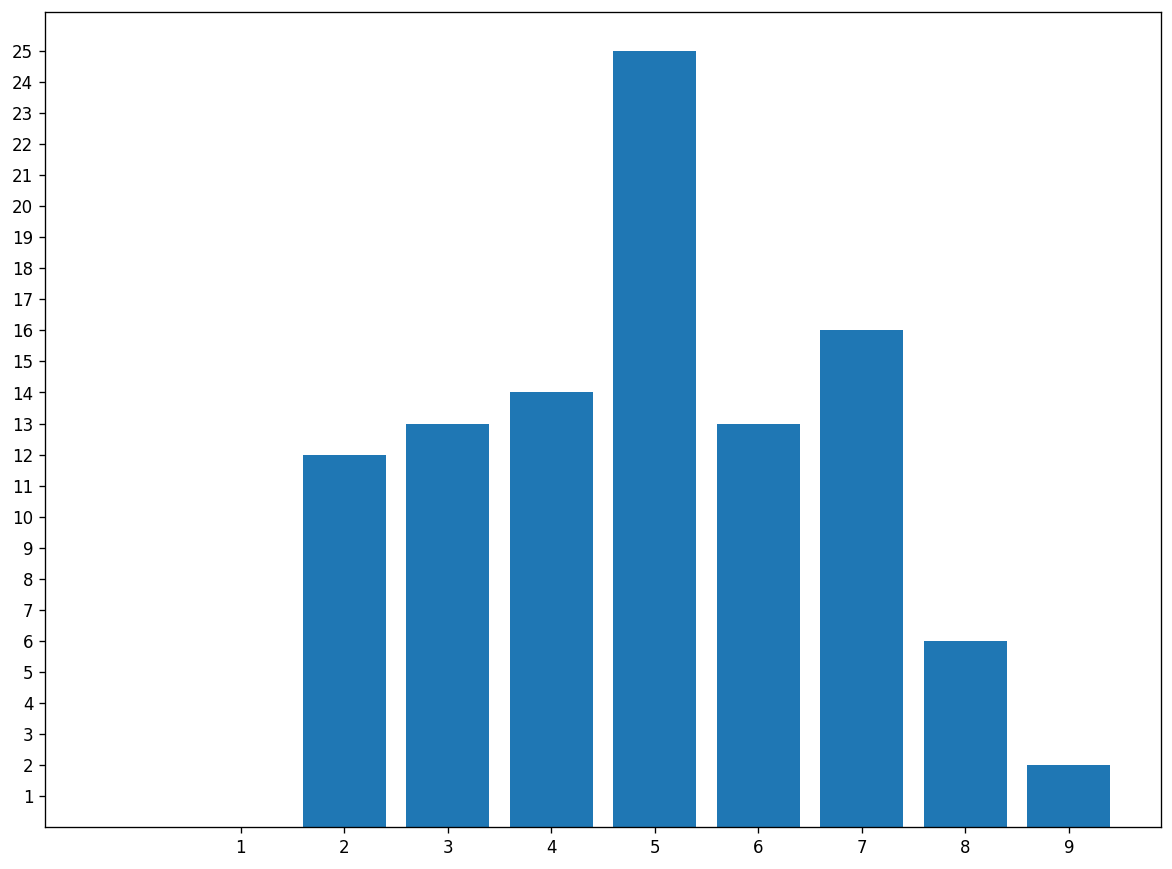

In [112]:
wo = []
wc = []
coun = 0
for i in exposure_dat:
    if i != 1:
        coun+=1
    elif i == 1:
        wo.append((coun/2))
        coun = 1

wo.append(coun/2)

for i in range(10):
    wc.append(wo.count(i))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9), dpi=120)
plt.xticks(range(1,11))
plt.yticks(range(1,26))
plt.bar(range(10), wc)

###B)
For each of the labels, there are 5 syllable pairs, which describe which output is activated when one of the inputs is given. It can be observed that some input-output pairs clash and this difference of output for the same input is crucial as it helps the model differentiate between the word labels, and helps in having correct output activations.

In [113]:
labels = ['W', 'PW', 'NW', '2NW']

for i in labels:
    print(i + 'ords')
    all_labels = lp.parse_sequence('/content/drive/My Drive/CSL_Lab/Lab2/labelSet2Syll' + i + '35.ex')
    for j in range(len(all_labels)-1):
        if j % 2 == 0:
            print(str(all_labels[j]) + ' --> ' + str(all_labels[j+1]))

Words
1 --> 2
8 --> 5
6 --> 0
4 --> 9
3 --> 7
PWords
2 --> 8
5 --> 6
0 --> 4
9 --> 3
7 --> 1
NWords
1 --> 2
8 --> 5
6 --> 0
4 --> 9
3 --> 7
2NWords
1 --> 8
2 --> 5
6 --> 4
0 --> 9
7 --> 3


###C)

2Nwords (actual name: labelSet2SyllNWc35.ex) contains novel-sequence non-words and Nwords (actual name: labelSet2SyllNW35.ex) contains novel-syllable non-words. A mark of identification would be that, novel-sequence non-words will have a completely different syllable than the ones in exposure phase, whereas the novel-syllable non-words, even though has new syllables, might have the same syllable transitions as it was in exposure phase.

##Exercise 3

###A)

The models were trained were 75 epochs and an average crossentropy error of 1.046 was reached, which is significantly lower than the crossentropy error of 3.0 at the beginning of the training.

A model was separately trained for 150 epochs, and the crossentropy loss at the end of the training was 0.8, with accuracy being 0.658 (0.007 increase compared to training of 75 epochs). This is an insignificant decrease in error rate for twice the amount of training. Therefore, training for 75 epochs of training is appropriate.

In [115]:
parser = LensParser()
bnzer = Binarizer(vocab_size=20)

exposure_data = parser.parse_sequence('/content/drive/My Drive/CSL_Lab/Lab2/exposureSet2Syll35.ex')

# inspect the first 10 tokens of the sequence
print(exposure_data[:10])

X_exposure, y_exposure = bnzer.binarize_sequence(exposure_data)

# inspect one-hot representations. Everything looks fine?
print(X_exposure.shape, y_exposure.shape)
print('-' * 48)
print(X_exposure[:,:10])
print('-' * 48)
print(y_exposure[:,:10])

[6, 0, 3, 7, 1, 2, 4, 9, 8, 5]
(1, 1000, 20) (1, 1000, 20)
------------------------------------------------
[[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]]
------------------------------------------------
[[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 

In [ ]:
acc, loss, mse = [], [], []

for i in range(10):
    model = Sequential([
        SimpleRNN(8, input_shape = (None, 20),
                  return_sequences = True,
                  activation = 'tanh',
                  name = 'hidden'),
        TimeDistributed(Dense(20, activation = 'softmax', name = 'output'))
    ])

    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = SGD(learning_rate = 0.05, momentum = 0.9),
                  metrics = ['categorical_accuracy', 'mean_squared_error'])

    exposure_phase = model.fit(X_exposure, y_exposure, epochs= 75, verbose=0)
    acc.append(exposure_phase.history['categorical_accuracy'][-1])
    loss.append(exposure_phase.history['loss'][-1])
    mse.append(exposure_phase.history['mean_squared_error'][-1])

print('Summary of each model:', model.summary())
print('Average accuracy over 10 runs: ' + str(np.mean(acc)))
print('Average loss over 10 runs: ' + str(np.mean(loss)))
print('Average MSE over 10 runs: ' + str(np.mean(mse)))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (SimpleRNN)          (None, None, 8)           232       
                                                                 
 time_distributed_10 (TimeDi  (None, None, 20)         180       
 stributed)                                                      
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________
Summary of each model: None
Average accuracy over 10 runs: 0.6322999894618988
Average loss over 10 runs: 0.9809861898422241
Average MSE over 10 runs: 0.022780645452439786


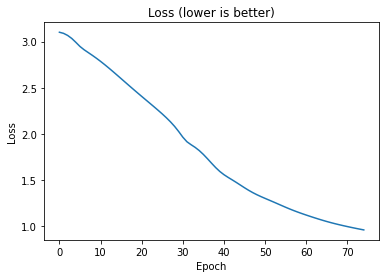

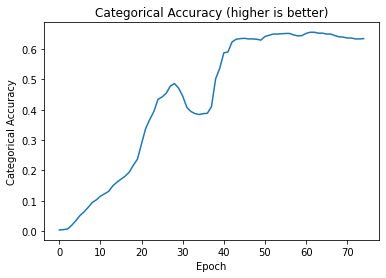

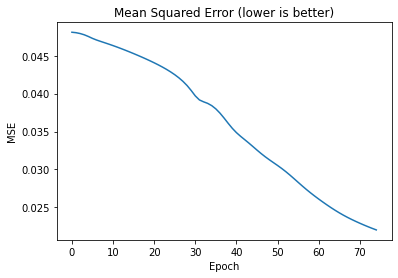

In [ ]:
plt.plot(exposure_phase.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_phase.history['categorical_accuracy'])
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_phase.history['mean_squared_error'])
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

postexposure_weights = model.get_weights()

Epoch 1/150
1/1 - 1s - loss: 2.9556 - categorical_accuracy: 0.0960 - mean_squared_error: 0.0473 - 1s/epoch - 1s/step
Epoch 2/150
1/1 - 0s - loss: 2.9485 - categorical_accuracy: 0.1000 - mean_squared_error: 0.0472 - 121ms/epoch - 121ms/step
Epoch 3/150
1/1 - 0s - loss: 2.9360 - categorical_accuracy: 0.1010 - mean_squared_error: 0.0472 - 121ms/epoch - 121ms/step
Epoch 4/150
1/1 - 0s - loss: 2.9196 - categorical_accuracy: 0.1030 - mean_squared_error: 0.0471 - 105ms/epoch - 105ms/step
Epoch 5/150
1/1 - 0s - loss: 2.9002 - categorical_accuracy: 0.1070 - mean_squared_error: 0.0470 - 107ms/epoch - 107ms/step
Epoch 6/150
1/1 - 0s - loss: 2.8774 - categorical_accuracy: 0.1140 - mean_squared_error: 0.0469 - 117ms/epoch - 117ms/step
Epoch 7/150
1/1 - 0s - loss: 2.8509 - categorical_accuracy: 0.1230 - mean_squared_error: 0.0467 - 107ms/epoch - 107ms/step
Epoch 8/150
1/1 - 0s - loss: 2.8214 - categorical_accuracy: 0.1310 - mean_squared_error: 0.0466 - 125ms/epoch - 125ms/step
Epoch 9/150
1/1 - 0s -

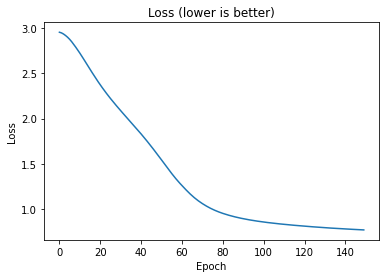

In [116]:
model_150e = Sequential([
        SimpleRNN(8, input_shape = (None, 20),
                  return_sequences = True,
                  activation = 'tanh',
                  name = 'hidden'),
        TimeDistributed(Dense(20, activation = 'softmax', name = 'output'))
    ])

model_150e.compile(loss = 'categorical_crossentropy', 
              optimizer = SGD(learning_rate = 0.05, momentum = 0.9),
              metrics = ['categorical_accuracy', 'mean_squared_error'])

exposure_phase_150 = model_150e.fit(X_exposure, y_exposure, epochs= 150, verbose=2)

plt.plot(exposure_phase_150.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

###B) 

The authors of the paper report that the training was done over 75 epochs. Half the training will not be sufficient, and to provide evidence for this, ten models were trained for 37 epochs each. Average accuracy was 0.549 and the average loss was 1.592. Accuracy was 15% less compared the accuracy of the models trained for 75 epochs, and Loss was 37% higher compared to the loss of models trained for 75 epochs.

In [117]:
acc, loss, mse = [], [], []

for i in range(10):
    epochs37_model = Sequential([
            SimpleRNN(8, input_shape = (None, 20),
                      return_sequences = True,
                      activation = 'tanh',
                      name = 'hidden'),
            TimeDistributed(Dense(20, activation = 'softmax', name = 'output'))
        ])

    epochs37_model.compile(loss = 'categorical_crossentropy', 
                  optimizer = SGD(learning_rate = 0.05, momentum = 0.9),
                  metrics = ['categorical_accuracy', 'mean_squared_error'])



    exposure_37 = epochs37_model.fit(X_exposure, y_exposure, epochs= 37, verbose=0)
    acc.append(exposure_37.history['categorical_accuracy'][-1])
    loss.append(exposure_37.history['loss'][-1])
    mse.append(exposure_37.history['mean_squared_error'][-1])

print(epochs37_model.summary())
print('Average accuracy over 10 runs: ' + str(np.mean(acc)))
print('Average loss over 10 runs: ' + str(np.mean(loss)))
print('Average MSE over 10 runs: ' + str(np.mean(mse)))

Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (SimpleRNN)          (None, None, 8)           232       
                                                                 
 time_distributed_162 (TimeD  (None, None, 20)         180       
 istributed)                                                     
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________
None
Average accuracy over 10 runs: 0.5095000118017197
Average loss over 10 runs: 1.6303111433982849
Average MSE over 10 runs: 0.03664350770413875


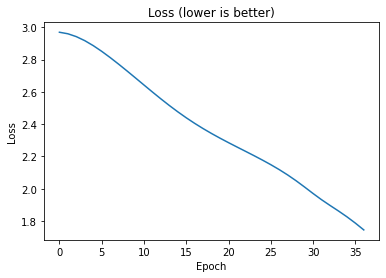

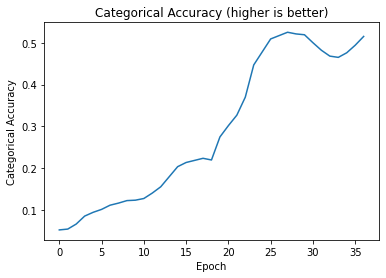

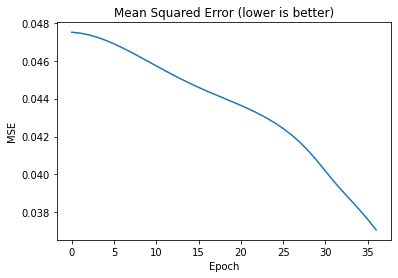

In [ ]:
plt.plot(exposure_37.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_37.history['categorical_accuracy'])
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(exposure_37.history['mean_squared_error'])
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

##Exercise 4

###A)

Novel-syllable nonwords must be included to study if the syllable familiarity had any effect on label learning.

### B)

Model must be initialized with the postexposure weights because the final weights from the exposure phase contain the transitional probabilities for the syllables, and since the study was connducted to establish the linnk between statistical learning and word learning, postexposure weights are necessary. 

###C)

Novel-syllable Nonwords were learned the fastest among all the labels Partwords were learned faster than Words and Novel-sequence Nonwords but slower than Novel-syllable Nonwords. Words and Novel-sequence Nonwords were learned at almost similar and slowest pace of all the labels.

###D)

From the simulation 2, it was suggested that children exhibit better learning of Nonword labels than partword labels and adults exhibit better learning of word labels than Nonword labels. From the graph below, it can be observed that the learning of Novel-syllable Nonwords was quicker than the learning of partwords, supporting the former suggestion. Therefore, the SRN model is simulating children, and not adults.

In [ ]:
word_labels = parser.parse_labels('/content/drive/My Drive/CSL_Lab/Lab2/labelSet2SyllW35.ex')
partword_labels = parser.parse_labels('/content/drive/My Drive/CSL_Lab/Lab2/labelSet2SyllPW35.ex')
nonword_labels1 = parser.parse_labels('/content/drive/My Drive/CSL_Lab/Lab2/labelSet2SyllNW35.ex')
nonword_labels2 = parser.parse_labels('/content/drive/My Drive/CSL_Lab/Lab2/labelSet2Syll2NW35.ex')


print('Word labels = {}'.format(word_labels))
print('PartWord labels = {}'.format(partword_labels))
print('NonWord labels = {}'.format(nonword_labels1))
print('NonWord labels = {}'.format(nonword_labels2))

word_data = random.choices(word_labels, k=100)
partword_data = random.choices(partword_labels, k=100)
nonword_data1 = random.choices(nonword_labels1, k=100)
nonword_data2 = random.choices(nonword_labels2, k=100)
print('\nFirst 5 word label examples = {}'.format(word_data[:5]))
print('First 5 partword label examples = {}'.format(partword_data[:5]))
print('First 5 nonword label examples = {}'.format(nonword_data1[:5]))
print('First 5 nonword label examples = {}'.format(nonword_data2[:5]))

Xw, yw = bnzer.binarize_labels(word_data)
Xpw, ypw = bnzer.binarize_labels(partword_data)
Xnw1, ynw1 = bnzer.binarize_labels(nonword_data1)
Xnw2, ynw2 = bnzer.binarize_labels(nonword_data2)

print('\nWord data shape = {}, labels shape = {}'.format(Xw.shape, yw.shape))
print('PartWord data shape = {}, labels shape = {}'.format(Xpw.shape, ypw.shape))
print('NonWord data shape = {}, labels shape = {}'.format(Xnw1.shape, ynw1.shape))
print('NonWord data shape = {}, labels shape = {}'.format(Xnw2.shape, ynw2.shape))

model.set_weights(postexposure_weights)
words_learning = model.fit(Xw, yw, epochs=100, verbose=0)
model.set_weights(postexposure_weights)
partwords_learning = model.fit(Xpw, ypw, epochs=100, verbose=0)
model.set_weights(postexposure_weights)
nonwords_learning1 = model.fit(Xnw1, ynw1, epochs=100, verbose=0)
model.set_weights(postexposure_weights)
nonwords_learning2 = model.fit(Xnw2, ynw2, epochs=100, verbose=0)

Word labels = [(1, 2, 10), (8, 5, 11), (6, 0, 12), (4, 9, 13), (3, 7, 14)]
PartWord labels = [(2, 8, 10), (5, 6, 11), (0, 4, 12), (9, 3, 13), (7, 1, 14)]
NonWord labels = [(11, 12, 10), (18, 15, 11), (16, 10, 12), (14, 19, 13), (13, 17, 14)]
NonWord labels = [(1, 8, 10), (2, 5, 11), (6, 4, 12), (0, 9, 13), (7, 3, 14)]

First 5 word label examples = [(3, 7, 14), (8, 5, 11), (6, 0, 12), (1, 2, 10), (6, 0, 12)]
First 5 partword label examples = [(2, 8, 10), (0, 4, 12), (5, 6, 11), (2, 8, 10), (5, 6, 11)]
First 5 nonword label examples = [(13, 17, 14), (11, 12, 10), (14, 19, 13), (18, 15, 11), (16, 10, 12)]
First 5 nonword label examples = [(7, 3, 14), (2, 5, 11), (6, 4, 12), (0, 9, 13), (2, 5, 11)]

Word data shape = (1, 200, 20), labels shape = (1, 200, 20)
PartWord data shape = (1, 200, 20), labels shape = (1, 200, 20)
NonWord data shape = (1, 200, 20), labels shape = (1, 200, 20)
NonWord data shape = (1, 200, 20), labels shape = (1, 200, 20)


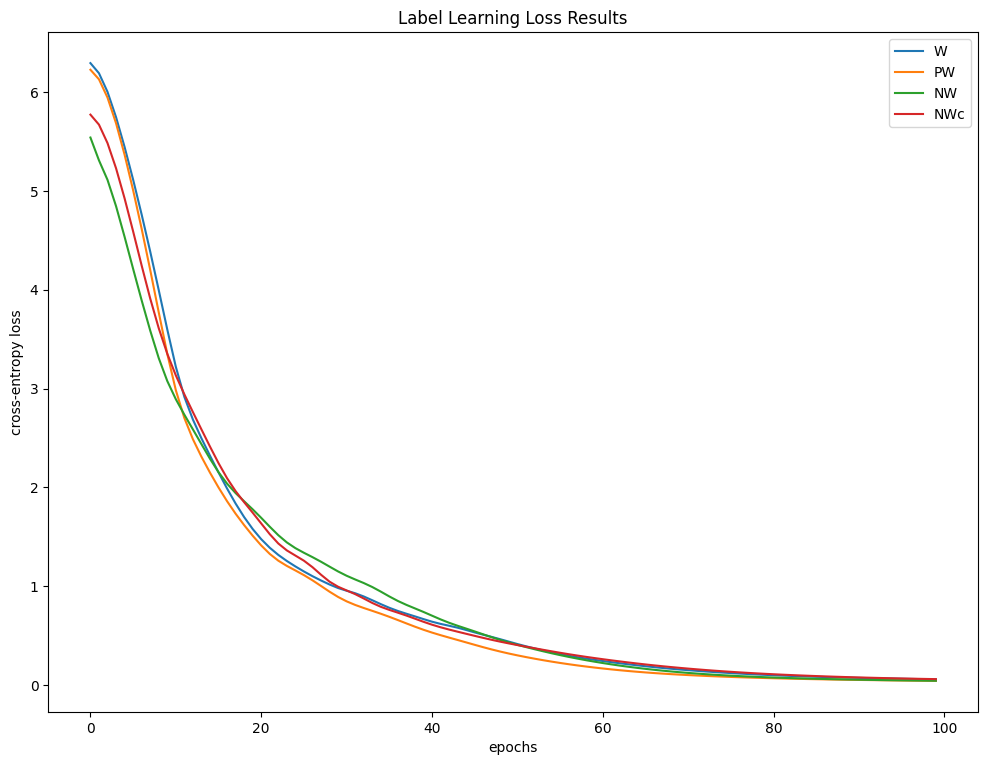

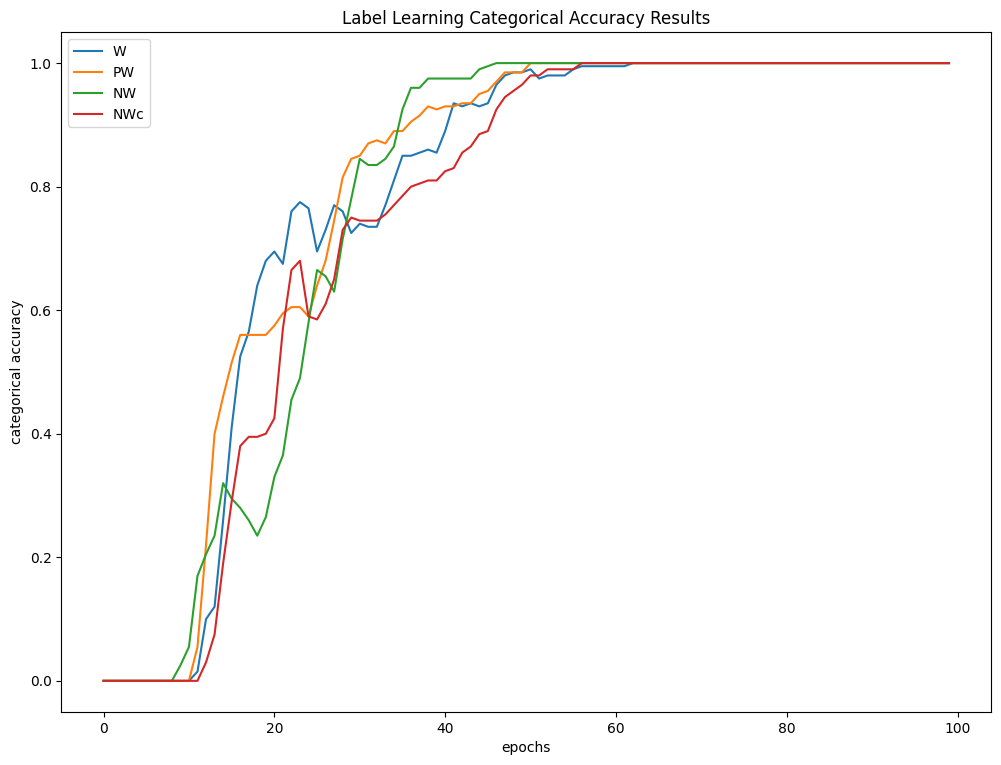

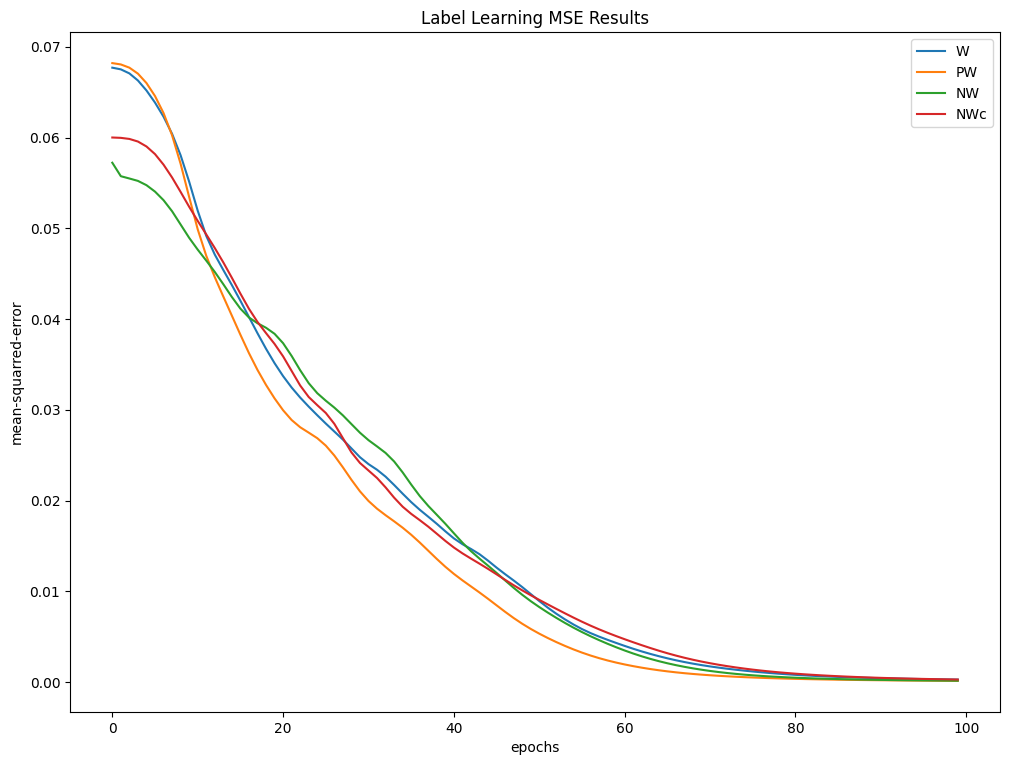

In [ ]:
losses = [words_learning.history['loss'], partwords_learning.history['loss'], \
          nonwords_learning1.history['loss'], nonwords_learning2.history['loss']]

accuracies = [words_learning.history['categorical_accuracy'], \
              partwords_learning.history['categorical_accuracy'], \
              nonwords_learning1.history['categorical_accuracy'], \
              nonwords_learning2.history['categorical_accuracy']]


MSEs = [words_learning.history['mean_squared_error'], \
        partwords_learning.history['mean_squared_error'], \
        nonwords_learning1.history['mean_squared_error'], \
        nonwords_learning2.history['mean_squared_error']]


multi_plot(losses, accuracies, MSEs)

#Part 2: Modelling Misyak et al.

##Exercise 5

###A)

The model has a total of 1170 weight parameters. Hidden layer has 465 weight parameters (including bias), context layer has 225 weight parameters, and Dense layer has 480 parameters (including bias).

###B)

The loss function used for training is categorical crossentropy. The metrics used are categorical crossentropy loss, categorical accuracy and mean squared error. The values of the loss represent in their absolute value how well the model is able to predict the end token for each string. Because the training involves data where the input-output relationship is one-to-one and in the training phase, the model learns what the correct category is. So, the mapping of the correct category to the input represents how well the model is able to predict. The values of accuracy and mean square error however does not represent how well the prediction was, for each string, because, categorical accuracy is a percentage of how many values in the prediction match the actual output, which is not a true measure of how well prediction works. Since, mean squared error is proportional to accuracy, mean squared error values do not represent how well the prediction was, for each string.

###C)

At the end of training of grammatical block, the decrease in loss was significant. However, the ungrammatical block increased the loss due to the model facing difficulty learning the correct output category for a particular input (since there are two output categories). With each epochs passed, the model learned the correct outputs and the loss decreased (but not significantly). With the introduction of recovery block, the loss decreased again, due to the training it received during the grammatical block.

In [15]:
import itertools

all_tokens = [
 'pel',
 'dak',
 'vot',
 'rid',
 'jic',
 'tood',
 'wadim',
 'kicey',
 'puser',
 'fengle',
 'coomo',
 'loga',
 'gople',
 'taspu',
 'hiftam',
 'deecha',
 'vamey',
 'skiger',
 'benez',
 'gensim',
 'feenam',
 'laelijeen',
 'chila',
 'roosa',
 'plizet',
 'balip',
 'malsig',
 'suleb',
 'nilbo',
 'wiffle'
]

start_tokens = all_tokens[:3]  ## {a,b,c}
end_tokens = all_tokens[3:6]   ## {d,e,f}
middle_tokens = all_tokens[6:] ## {X1,...,X24}

grammar_map = {
    'pel' : 'rid',   ## a->d
    'dak' : 'jic',   ## b->e
    'vot' : 'tood'   ## c->f
}

non_grammar_map = {
    'pel' : ['jic', 'tood'],
    'dak' : ['rid', 'tood'],
    'vot' : ['rid', 'jic']
}

In [74]:
def generate_grammatical_block():
    return [(*r, grammar_map[r[0]]) for r in itertools.product(start_tokens, middle_tokens)]

def generate_ungrammatical_block(num_strings=24):
    ung = []
    alt = 0
    for r in itertools.product(start_tokens, middle_tokens):
        if alt == 0:
            temp = (*r, non_grammar_map[r[0]][0])
            alt = 1
        elif alt == 1:
            temp = (*r, non_grammar_map[r[0]][1])
            alt = 0
        ung.append(temp)
    ung_block = ung[0:8] + ung[32:40] + ung[64:72]
    return ung_block


print(generate_grammatical_block())


[('pel', 'wadim', 'rid'), ('pel', 'kicey', 'rid'), ('pel', 'puser', 'rid'), ('pel', 'fengle', 'rid'), ('pel', 'coomo', 'rid'), ('pel', 'loga', 'rid'), ('pel', 'gople', 'rid'), ('pel', 'taspu', 'rid'), ('pel', 'hiftam', 'rid'), ('pel', 'deecha', 'rid'), ('pel', 'vamey', 'rid'), ('pel', 'skiger', 'rid'), ('pel', 'benez', 'rid'), ('pel', 'gensim', 'rid'), ('pel', 'feenam', 'rid'), ('pel', 'laelijeen', 'rid'), ('pel', 'chila', 'rid'), ('pel', 'roosa', 'rid'), ('pel', 'plizet', 'rid'), ('pel', 'balip', 'rid'), ('pel', 'malsig', 'rid'), ('pel', 'suleb', 'rid'), ('pel', 'nilbo', 'rid'), ('pel', 'wiffle', 'rid'), ('dak', 'wadim', 'jic'), ('dak', 'kicey', 'jic'), ('dak', 'puser', 'jic'), ('dak', 'fengle', 'jic'), ('dak', 'coomo', 'jic'), ('dak', 'loga', 'jic'), ('dak', 'gople', 'jic'), ('dak', 'taspu', 'jic'), ('dak', 'hiftam', 'jic'), ('dak', 'deecha', 'jic'), ('dak', 'vamey', 'jic'), ('dak', 'skiger', 'jic'), ('dak', 'benez', 'jic'), ('dak', 'gensim', 'jic'), ('dak', 'feenam', 'jic'), ('dak',

In [75]:
gram_block = random.sample(generate_grammatical_block(), 72)
ungr_block = random.sample(generate_ungrammatical_block(), 24)
rec_block = random.sample(generate_grammatical_block(), 72)

encoder = LabelBinarizer()
encoder.fit(all_tokens)

gram_tokens = [token for tokens in gram_block for token in tokens]
ungr_tokens = [token for tokens in ungr_block for token in tokens]
rec_tokens = [token for tokens in rec_block for token in tokens]

gram_vectors = encoder.transform(gram_tokens)
ungr_vectors = encoder.transform(ungr_tokens)
rec_vectors = encoder.transform(rec_tokens)

X_gram = gram_vectors[np.newaxis, :]
y_gram = np.append(gram_vectors[1:], gram_vectors[:1], axis=0)[np.newaxis, :]

X_ungr = ungr_vectors[np.newaxis, :]
y_ungr = np.append(ungr_vectors[1:], ungr_vectors[:1], axis=0)[np.newaxis, :]

X_rec = rec_vectors[np.newaxis, :]
y_rec = np.append(rec_vectors[1:], rec_vectors[:1], axis=0)[np.newaxis, :]

print(X_gram.shape, y_gram.shape, X_ungr.shape, y_ungr.shape, X_rec.shape, y_rec.shape)

(1, 216, 30) (1, 216, 30) (1, 72, 30) (1, 72, 30) (1, 216, 30) (1, 216, 30)


In [8]:
def create_misyak():
    misyak_model = Sequential([
        SimpleRNN(15, input_shape=(None, 30),
                  return_sequences= True,
                  activation='tanh',
                  recurrent_initializer= RandomUniform(minval = -1, maxval = 1),
                  name='hidden'),
        TimeDistributed(Dense(30, activation='softmax', name='output'))
    ])

    misyak_model.compile(loss= 'categorical_crossentropy', 
                  optimizer=SGD(learning_rate = 0.1, momentum= 0.8),
                  metrics=['categorical_accuracy', 'mean_squared_error'])

    return misyak_model

In [24]:
scale_factor = 5
mo_loss, mo_acc, mo_mse = [], [], []
for i in range(30):
    mm = create_misyak()
    print('-'*100)
    print('Phase 1: 6 grammatical blocks of 72 strings..\n')
    phase_1 = mm.fit(X_gram, y_gram, epochs=6*scale_factor, verbose=0)
    ph1_loss = phase_1.history['loss']
    ph1_acc = phase_1.history['categorical_accuracy']
    ph1_mse = phase_1.history['mean_squared_error']
    print('-'*100)

    print('Phase 2: 1 ungrammatical block of 24 strings..\n') 
    phase_2 = mm.fit(X_ungr, y_ungr, epochs=1*scale_factor, verbose=0)
    ph2_loss = phase_2.history['loss']
    ph2_acc = phase_2.history['categorical_accuracy']
    ph2_mse = phase_2.history['mean_squared_error']
    print('-'*100)

    print('Phase 3: 1 recovery block of 72 strings..\n')
    phase_3 = mm.fit(X_rec, y_rec, epochs=1*scale_factor, verbose=0)
    ph3_loss = phase_3.history['loss']
    ph3_acc = phase_3.history['categorical_accuracy']
    ph3_mse = phase_3.history['mean_squared_error']
    print('-'*100)

    mo_loss.append(ph1_loss + ph2_loss + ph3_loss)
    mo_acc.append(ph1_acc + ph2_acc + ph3_acc)
    mo_mse.append(ph1_mse + ph2_mse + ph3_mse)
print(mm.summary())

----------------------------------------------------------------------------------------------------
Phase 1: 6 grammatical blocks of 72 strings..

----------------------------------------------------------------------------------------------------
Phase 2: 1 ungrammatical block of 24 strings..

----------------------------------------------------------------------------------------------------
Phase 3: 1 recovery block of 72 strings..

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Phase 1: 6 grammatical blocks of 72 strings..

----------------------------------------------------------------------------------------------------
Phase 2: 1 ungrammatical block of 24 strings..

----------------------------------------------------------------------------------------------------
Phase 3: 1 recovery block of 72 strings..

-----------------

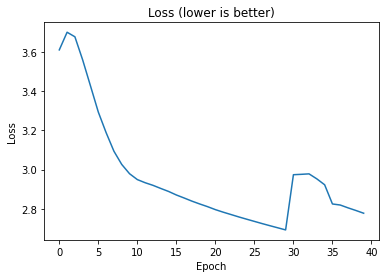

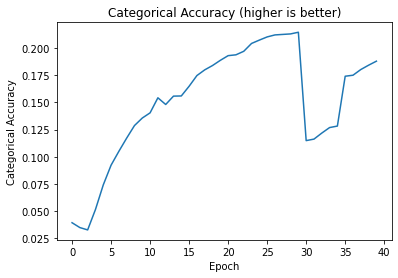

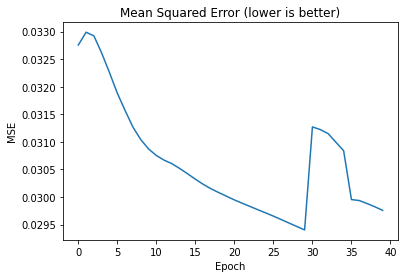

In [14]:
fi_loss, fi_acc, fi_mse = [], [], []
for i in range(40):
    f_loss, f_acc, f_mse = 0, 0, 0
    for j in range(30):
        f_loss += mo_loss[j][i]
        f_acc += mo_acc[j][i]
        f_mse += mo_mse[j][i]
    fi_loss.append(f_loss/30)
    fi_acc.append(f_acc/30)
    fi_mse.append(f_mse/30)

plt.plot(fi_loss)
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(fi_acc)
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(fi_mse)
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

###D)

The mean score of 30 runs were taken because averaging the score would eliminate any skewed results that were obtained since the weights were randomly initialised with uniform distribution.

###E)

//The last cell of this subsection has the code that calculates and prints the luce ratio.

In [20]:
pred_block = random.sample(generate_grammatical_block(), 12)

print(pred_block)

[('dak', 'skiger', 'jic'), ('dak', 'vamey', 'jic'), ('vot', 'fengle', 'tood'), ('vot', 'puser', 'tood'), ('vot', 'deecha', 'tood'), ('vot', 'vamey', 'tood'), ('dak', 'roosa', 'jic'), ('vot', 'wadim', 'tood'), ('dak', 'wiffle', 'jic'), ('dak', 'wadim', 'jic'), ('vot', 'chila', 'tood'), ('dak', 'puser', 'jic')]


In [25]:
pred_tokens = [token for tokens in pred_block for token in tokens]
pred_vectors = encoder.transform(pred_tokens)
X_pred = pred_vectors[np.newaxis, :]

predictions = encoder.inverse_transform(np.array(mm.predict(X_pred)[0]))

print('12-item prediction task input tokens:\n{}'.format(pred_tokens))
print('\n12-item prediction task output predictions:\n{}'.format(predictions))

12-item prediction task input tokens:
['dak', 'skiger', 'jic', 'dak', 'vamey', 'jic', 'vot', 'fengle', 'tood', 'vot', 'puser', 'tood', 'vot', 'deecha', 'tood', 'vot', 'vamey', 'tood', 'dak', 'roosa', 'jic', 'vot', 'wadim', 'tood', 'dak', 'wiffle', 'jic', 'dak', 'wadim', 'jic', 'vot', 'chila', 'tood', 'dak', 'puser', 'jic']

12-item prediction task output predictions:
['pel' 'dak' 'rid' 'rid' 'rid' 'rid' 'pel' 'tood' 'vot' 'dak' 'vot' 'dak'
 'jic' 'dak' 'vot' 'dak' 'pel' 'dak' 'rid' 'rid' 'rid' 'pel' 'tood' 'vot'
 'dak' 'vot' 'dak' 'vot' 'jic' 'pel' 'dak' 'vot' 'jic' 'pel' 'dak' 'vot']


In [66]:
acti = get_activation_matrix(mm, X_pred, layers=[mm.layers[1]])
acti = acti[0]
luce_ratio = []

for i in range(36):
    luce = []
    for j in acti[i]:
        ratio = j/np.sum(acti[i])
        luce.append(ratio)
    luce_ratio.append(luce)
for i in luce_ratio:
    print(i)

[0.018954836, 0.018105729, 0.004551269, 0.017991995, 0.095085524, 0.015584293, 0.0040880223, 0.0068929056, 0.011467449, 0.0077756257, 0.02783751, 0.044220444, 0.024805155, 0.027373558, 0.037413016, 0.01165305, 0.017737245, 0.2346305, 0.006145921, 0.050231468, 0.066414535, 0.009675673, 0.028960656, 0.02659862, 0.02808251, 0.040716276, 0.0025768122, 0.066202804, 0.043199416, 0.005027191]
[0.010026756, 0.008960777, 0.02170847, 0.010866963, 0.16723208, 0.0074611427, 0.008963748, 0.018181948, 0.021374268, 0.014931638, 0.015626768, 0.10395286, 0.009216028, 0.0072662444, 0.0114250695, 0.01552966, 0.013152441, 0.1270542, 0.018913208, 0.008414761, 0.16172366, 0.016920283, 0.012311779, 0.008145143, 0.015833154, 0.032215726, 0.020657437, 0.088633, 0.009948788, 0.013352076]
[0.0147547135, 0.01343423, 0.0131311035, 0.01385019, 0.11632904, 0.012131093, 0.01353541, 0.012931909, 0.013031521, 0.012793964, 0.012678079, 0.12697567, 0.013972616, 0.009265323, 0.011850221, 0.011518675, 0.011550539, 0.108725

#Part 3: Extending Misyak et al.

##Exercise 6

###A)

Looking the accuracy graph, it can be said that the performance of the model was significantly poorer compared to the actual model (1 middle word). Introduction of ungrammatical block reduced the accuracy at first and through epochs had a minor improvement, similar to the effect it had in the actual model (1 middle word). However, the recovery block which improved the accuracy in the actual model (1 middle word), had an ironic effect and reduced the acccuracy. Through epochs, it slowly improved the accuracy back to the accuracy the model had at the end of ungrammatical block. 

Nota bene: The loss and mse could not be plotted because most of the models produced NaN values (an inspection can be found below). However, it is of the belief that recovery block increased the loss and mse initially, and later, through learning again, decreased the loss and mse. This should be the case, as it is known that loss and mse are inversely proportional.

In [93]:
def grammatical_block_2words():
    return [(*r, grammar_map[r[0]]) for r in itertools.product(start_tokens, middle_tokens, middle_tokens)]

def ungrammatical_block_2words():
    ung = []
    alt = 0
    for r in itertools.product(start_tokens, middle_tokens, middle_tokens):
        if alt == 0:
            temp = (*r, non_grammar_map[r[0]][0])
            alt = 1
        elif alt == 1:
            temp = (*r, non_grammar_map[r[0]][1])
            alt = 0
        ung.append(temp)
    ung_block = ung[0:192] + ung[768:960] + ung[1536:1728]
    return ung_block

print(grammatical_block_2words())
print(ungrammatical_block_2words())

[('pel', 'wadim', 'wadim', 'rid'), ('pel', 'wadim', 'kicey', 'rid'), ('pel', 'wadim', 'puser', 'rid'), ('pel', 'wadim', 'fengle', 'rid'), ('pel', 'wadim', 'coomo', 'rid'), ('pel', 'wadim', 'loga', 'rid'), ('pel', 'wadim', 'gople', 'rid'), ('pel', 'wadim', 'taspu', 'rid'), ('pel', 'wadim', 'hiftam', 'rid'), ('pel', 'wadim', 'deecha', 'rid'), ('pel', 'wadim', 'vamey', 'rid'), ('pel', 'wadim', 'skiger', 'rid'), ('pel', 'wadim', 'benez', 'rid'), ('pel', 'wadim', 'gensim', 'rid'), ('pel', 'wadim', 'feenam', 'rid'), ('pel', 'wadim', 'laelijeen', 'rid'), ('pel', 'wadim', 'chila', 'rid'), ('pel', 'wadim', 'roosa', 'rid'), ('pel', 'wadim', 'plizet', 'rid'), ('pel', 'wadim', 'balip', 'rid'), ('pel', 'wadim', 'malsig', 'rid'), ('pel', 'wadim', 'suleb', 'rid'), ('pel', 'wadim', 'nilbo', 'rid'), ('pel', 'wadim', 'wiffle', 'rid'), ('pel', 'kicey', 'wadim', 'rid'), ('pel', 'kicey', 'kicey', 'rid'), ('pel', 'kicey', 'puser', 'rid'), ('pel', 'kicey', 'fengle', 'rid'), ('pel', 'kicey', 'coomo', 'rid'), 

In [94]:
e_gram_block = random.sample(grammatical_block_2words(), 1728)
e_ungr_block = random.sample(ungrammatical_block_2words(), 576)
e_rec_block = random.sample(grammatical_block_2words(), 1728)

encoder = LabelBinarizer()
encoder.fit(all_tokens)

e_gram_tokens = [token for tokens in e_gram_block for token in tokens]
e_ungr_tokens = [token for tokens in e_ungr_block for token in tokens]
e_rec_tokens = [token for tokens in e_rec_block for token in tokens]

e_gram_vectors = encoder.transform(e_gram_tokens)
e_ungr_vectors = encoder.transform(e_ungr_tokens)
e_rec_vectors = encoder.transform(e_rec_tokens)

X_gram_e = e_gram_vectors[np.newaxis, :]
y_gram_e = np.append(e_gram_vectors[1:], e_gram_vectors[:1], axis=0)[np.newaxis, :]

X_ungr_e = e_ungr_vectors[np.newaxis, :]
y_ungr_e = np.append(e_ungr_vectors[1:], e_ungr_vectors[:1], axis=0)[np.newaxis, :]

X_rec_e = e_rec_vectors[np.newaxis, :]
y_rec_e = np.append(e_rec_vectors[1:], e_rec_vectors[:1], axis=0)[np.newaxis, :]

print(X_gram_e.shape, y_gram_e.shape, X_ungr_e.shape, y_ungr_e.shape, X_rec_e.shape, y_rec_e.shape)

(1, 6912, 30) (1, 6912, 30) (1, 2304, 30) (1, 2304, 30) (1, 6912, 30) (1, 6912, 30)


In [103]:
scale_factor = 5
mo_loss, mo_acc, mo_mse = [], [], []
for i in range(30):
    mm = create_misyak()
    print('Model: ', i)
    print('-'*100)
    print('Phase 1: 6 grammatical blocks of 1728 strings..\n')
    phase_1 = mm.fit(X_gram_e, y_gram_e, epochs=6*scale_factor, verbose=0)
    ph1_loss = phase_1.history['loss']
    ph1_acc = phase_1.history['categorical_accuracy']
    ph1_mse = phase_1.history['mean_squared_error']
    print('-'*100)

    print('Phase 2: 1 ungrammatical block of 576 strings..\n') 
    phase_2 = mm.fit(X_ungr_e, y_ungr_e, epochs=1*scale_factor, verbose=0)
    ph2_loss = phase_2.history['loss']
    ph2_acc = phase_2.history['categorical_accuracy']
    ph2_mse = phase_2.history['mean_squared_error']
    print('-'*100)

    print('Phase 3: 1 recovery block of 1728 strings..\n')
    phase_3 = mm.fit(X_rec_e, y_rec_e, epochs=1*scale_factor, verbose=0)
    ph3_loss = phase_3.history['loss']
    ph3_acc = phase_3.history['categorical_accuracy']
    ph3_mse = phase_3.history['mean_squared_error']
    print('-'*100)

    mo_loss.append(ph1_loss + ph2_loss + ph3_loss)
    mo_acc.append(ph1_acc + ph2_acc + ph3_acc)
    mo_mse.append(ph1_mse + ph2_mse + ph3_mse)
print(mm.summary())

----------------------------------------------------------------------------------------------------
Phase 1: 6 grammatical blocks of 1728 strings..

----------------------------------------------------------------------------------------------------
Phase 2: 1 ungrammatical block of 576 strings..

----------------------------------------------------------------------------------------------------
Phase 3: 1 recovery block of 1728 strings..

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Phase 1: 6 grammatical blocks of 1728 strings..

----------------------------------------------------------------------------------------------------
Phase 2: 1 ungrammatical block of 576 strings..

----------------------------------------------------------------------------------------------------
Phase 3: 1 recovery block of 1728 strings..

-------

In [107]:
mo_loss

[[3.496251344680786,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [3.5706140995025635,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [3.778176784515381,
  3.9520437717437744,
  3.538933753967285,
  3.4873738288879395,
  3.3930559158325195,
  3.2734572887420654,
  3.15012264251709,
  3.0397751331329346,
  2.95357084274292,
  2.8959848880767822,
  2.8655669689178467,
  2.856393814086914,
  2.860234498977661,
  2.8687784671783447,
  2.8755929470062256,
  2.8772873878479004,
  2.8735623359680176,
  2.8661317825317383,
  2.857300281524658,


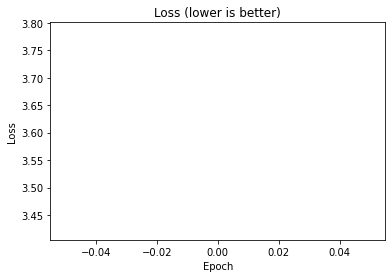

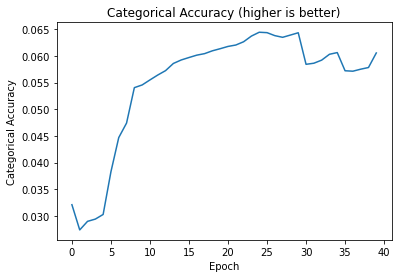

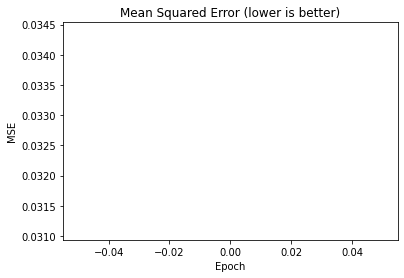

In [108]:
fi_loss, fi_acc, fi_mse = [], [], []
for i in range(40):
    f_loss, f_acc, f_mse = 0, 0, 0
    for j in range(30):
        f_loss += mo_loss[j][i]
        f_acc += mo_acc[j][i]
        f_mse += mo_mse[j][i]
    fi_loss.append(f_loss/30)
    fi_acc.append(f_acc/30)
    fi_mse.append(f_mse/30)

plt.plot(fi_loss)
plt.title('Loss (lower is better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(fi_acc)
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(fi_mse)
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

###B)

The prediction capacity of the model is severely damaged compared the actual model (1 middle word). During training, the accuracy in the actual model was 20% and it was 6.5% in this model, at the end of phase 1. The final accuracy was really low as well. The similarity of the two models is that the grammatical blocks improved accuracy (ignoring the rate of improvement) and introduction of the ungrammatical block lead to fall in the accuracy (possibly of different magnitudes, but nevertheless, decreased the accuracy). After prediction block, it was concluded that the predcition capacity of the model was completely damaged, and was predicting the same value for different inputs.

In [110]:
pred_block = random.sample(grammatical_block_2words(), 12)

pred_tokens = [token for tokens in pred_block for token in tokens]
pred_vectors = encoder.transform(pred_tokens)
X_pred = pred_vectors[np.newaxis, :]

predictions = encoder.inverse_transform(np.array(mm.predict(X_pred)[0]))

print('12-item prediction task input tokens:\n{}'.format(pred_tokens))
print('\n12-item prediction task output predictions:\n{}'.format(predictions))

12-item prediction task input tokens:
['pel', 'balip', 'suleb', 'rid', 'dak', 'fengle', 'roosa', 'jic', 'pel', 'fengle', 'balip', 'rid', 'vot', 'puser', 'benez', 'tood', 'dak', 'loga', 'nilbo', 'jic', 'dak', 'balip', 'hiftam', 'jic', 'dak', 'vamey', 'feenam', 'jic', 'pel', 'nilbo', 'hiftam', 'rid', 'pel', 'gople', 'balip', 'rid', 'pel', 'malsig', 'skiger', 'rid', 'dak', 'plizet', 'coomo', 'jic', 'dak', 'wadim', 'taspu', 'jic']

12-item prediction task output predictions:
['balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip'
 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip'
 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip'
 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip'
 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip' 'balip'
 'balip' 'balip' 'balip']


###C)

The model failed in this task, as if it had learned more than one step back in time, the accuracy would have been on the same scale as the actual model (1 middle word), and would not have collapsed.

###D)

The human subjects are not good at learning ungrammatical blocks and trying to learn the ungrammatical block could damage the learning that the human subjects already had. 

This might be the case in reality as well, as it can be noticed often multiliigual people sometimes struggle to find the right words due the different grammatical structures (grammatical block in a language can be considered ungrammatical in another) of different languages the speaker knows.